In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [14]:
Hitters = pd.read_csv("Hitters.csv")
# remove non-numeric columns
df =  Hitters.drop(columns=['League','Division','NewLeague'])
# remove first column and NA records
df = df.dropna().drop(['Unnamed: 0'],axis=1)

X = df.drop(['Salary'],axis=1)
y = df['Salary']

### 1.1 Lasso

Text(0, 0.5, 'weights')

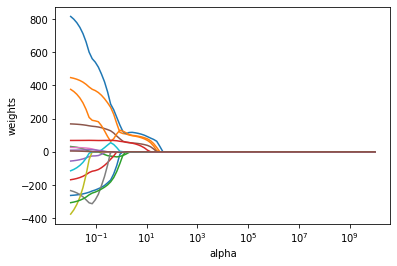

In [16]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

#Coefficient Trajectories
alphas = 10**np.linspace(10,-2,100)*0.5  #Generate an array of alpha values

lasso = Lasso(max_iter=100000,normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

#### The final three predictors that remain in the model are 'Hits', 'CRuns','CRBI'

In [18]:
num = []
count = 0

for i in range(len(coefs)):
    for j in range(0,16):
        if coefs[i][j] != 0:
            count += 1
    num.append(count)
    count = 0
    
for i in range(len(num)):
    if num[i] == 3:
        print(i)

71


In [19]:
coefs[71]

array([ 0.        ,  6.50237129,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       63.17668598, 25.58063193,  0.        ,  0.        ,  0.        ,
        0.        ])

In [29]:
# Cross-Validation

lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=1.742891064175729, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
print('The optimal value of the regularization penalty is',lassocv.alpha_)

The optimal value of the regularization penalty is 1.742891064175729


In [23]:
pd.Series(lasso.coef_, index=X.columns)
print('There are 5 predictors are left in the model')

There are 5 predictors are left in the model


### 1.2 Ridge

Text(0, 0.5, 'weights')

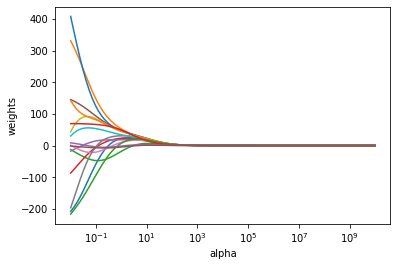

In [24]:
#Coefficient Trajectories

alphas = 10**np.linspace(10,-2,100)*0.5  #Generate an array of alpha values

ridge = Ridge(max_iter=100000,normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [25]:
#Cross-validation

In [30]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)

ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.4348745013088917, copy_X=True, fit_intercept=True,
      max_iter=100000, normalize=True, random_state=None, solver='auto',
      tol=0.001)

In [27]:
print('The optimal value of the regularization penalty is',ridgecv.alpha_)

The optimal value of the regularization penalty is 0.4348745013088917


### 2. Short Answer

Bias and Variance Tradeoff

I think the tradeoff means that, in real world, you can't always keep both variance and bias low, which is considered as the best situation. When overfitting occurs, we will have low bias and high variance, which means that the model captures too much noise. When underfitting occurs, we will have high bias and low variance, which means that the mode can't capture the pattern of a dataset. What we want to avoid is the extreme cases like overfitting and underfitting, so we need a balance between bias and variance.

What role does regularization play in this tradeoff ?

Regularization is the process of adding tuning parameter to a model in order to prevent overfitting. In other words, the penaltity term in regularization technique like lasso and ridge increases bias and decreases variance.

Make reference to your findings in number (1) to describe models of high/low bias and variance

In our problem above, the value of alpha decides the size of penality. If alpha is 0, the penalty term would be 0. Then the result would be classical least square coefficient. However, if the value of alpha is close to infinity, the coefficient would get close to 0. Since the alpha of value and ridge above are around 0.1 and 0.3, our models have low bias and high variance